<a href="https://colab.research.google.com/github/santiagorojas1998/TPGRUPAL/blob/main/TP_Grupal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Carga de base de datos

In [ ]:
import pandas as pd

url = "https://raw.githubusercontent.com/santiagorojas1998/TPGRUPAL/main/preciodeviviendas"

df = pd.read_csv(url)
df.head()

,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc

In [ ]:
print("\nInformación general del dataset:")
df.info()


Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-

In [ ]:
# Calcular porcentaje de nulos por columna
porcentajes = df.isnull().sum() / df.shape[0]

# Filtrar columnas con al menos un nulo
nulos = porcentajes[porcentajes > 0]

# Obtener los tipos de dato correspondientes
tipos = df.dtypes[nulos.index]

# Combinar en un DataFrame
resumen = pd.DataFrame({
    'Porcentaje_nulos': nulos.sort_values(ascending=False),
    'Tipo_dato': tipos[nulos.sort_values(ascending=False).index]
})

# Mostrar resultado
print(resumen)

                Porcentaje_nulos Tipo_dato
Pool QC                 0.995563    object
Misc Feature            0.963823    object
Alley                   0.932423    object
Fence                   0.804778    object
Mas Vnr Type            0.605802    object
Fireplace Qu            0.485324    object
Lot Frontage            0.167235   float64
Garage Qual             0.054266    object
Garage Cond             0.054266    object
Garage Yr Blt           0.054266   float64
Garage Finish           0.054266    object
Garage Type             0.053584    object
Bsmt Exposure           0.028328    object
BsmtFin Type 2          0.027645    object
Bsmt Cond               0.027304    object
Bsmt Qual               0.027304    object
BsmtFin Type 1          0.027304    object
Mas Vnr Area            0.007850   float64
Bsmt Full Bath          0.000683   float64
Bsmt Half Bath          0.000683   float64
BsmtFin SF 1            0.000341   float64
BsmtFin SF 2            0.000341   float64
Electrical 

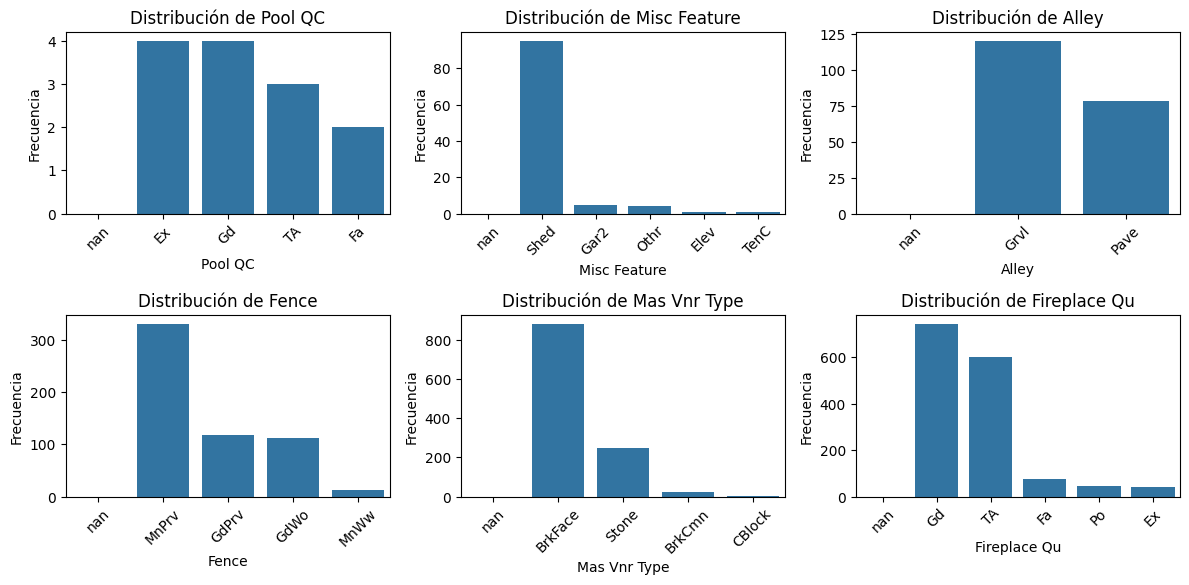

In [ ]:
# Columnas a graficar
cols = ['Pool QC', 'Misc Feature', 'Alley', 'Fence','Mas Vnr Type', 'Fireplace Qu']

# Tamaño del gráfico
plt.figure(figsize=(12, 8))

# Crear un subplot por columna
for i, col in enumerate(cols, 1):
    plt.subplot(3, 3, i)
    sns.countplot(data=df, x=col, order=df[col].value_counts(dropna=False).index)
    plt.title(f'Distribución de {col}')
    plt.xticks(rotation=45)
    plt.xlabel(col)
    plt.ylabel('Frecuencia')

plt.tight_layout()
plt.show()